# Anomaly Method

# To implement classification weather for given recoed the Global intensity is greater then 15 or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("hpc_breakdowns.csv")
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [5]:
df['y_lgreg'] = df['Global_intensity'].apply(lambda x : 1 if x >15 else 0)
df.drop(['Global_intensity'],1,inplace=True)

In [6]:
df.drop('Unnamed: 0',1,inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,16/12/2006,17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,1
1,16/12/2006,17:25:00,5.360,0.436,233.63,0.0,1.0,16.0,1
2,16/12/2006,17:26:00,5.374,0.498,233.29,0.0,2.0,17.0,1
3,16/12/2006,17:27:00,5.388,0.502,233.74,0.0,1.0,17.0,1
4,16/12/2006,17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
 8   y_lgreg                int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 140.7+ MB


In [8]:
100*round(df.isnull().sum()/len(df),5)

Date                     0.000
Time                     0.000
Global_active_power      0.100
Global_reactive_power    0.023
Voltage                  0.099
Sub_metering_1           0.063
Sub_metering_2           0.059
Sub_metering_3           0.006
y_lgreg                  0.000
dtype: float64

In [9]:
df.shape

(2049280, 9)

In [10]:
df['DateTime'] = df.Date+' '+df.Time
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,0.0,1.0,17.0,1,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,0.0,1.0,16.0,1,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,0.0,2.0,17.0,1,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,0.0,1.0,17.0,1,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,0.0,1.0,17.0,1,16/12/2006 17:28:00


In [11]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format= "%d/%m/%Y %H:%M:%S")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   y_lgreg                int64         
 9   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 156.3+ MB


In [13]:
df.drop(['Date', 'Time'],1,inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg,DateTime
0,4.216,0.418,234.84,0.0,1.0,17.0,1,2006-12-16 17:24:00
1,5.360,0.436,233.63,0.0,1.0,16.0,1,2006-12-16 17:25:00
2,5.374,0.498,233.29,0.0,2.0,17.0,1,2006-12-16 17:26:00
3,5.388,0.502,233.74,0.0,1.0,17.0,1,2006-12-16 17:27:00
4,3.666,0.528,235.68,0.0,1.0,17.0,1,2006-12-16 17:28:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Sub_metering_1         float64       
 4   Sub_metering_2         float64       
 5   Sub_metering_3         float64       
 6   y_lgreg                int64         
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 125.1 MB


In [15]:
df.DateTime.max()

Timestamp('2010-11-26 21:02:00')

In [16]:
df.DateTime.min()

Timestamp('2006-12-16 17:24:00')

In [17]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg,DateTime
0,4.216,0.418,234.84,0.0,1.0,17.0,1,2006-12-16 17:24:00
1,5.360,0.436,233.63,0.0,1.0,16.0,1,2006-12-16 17:25:00
2,5.374,0.498,233.29,0.0,2.0,17.0,1,2006-12-16 17:26:00
3,5.388,0.502,233.74,0.0,1.0,17.0,1,2006-12-16 17:27:00
4,3.666,0.528,235.68,0.0,1.0,17.0,1,2006-12-16 17:28:00


In [18]:
df.y_lgreg.value_counts(normalize = True)

0    0.962155
1    0.037845
Name: y_lgreg, dtype: float64

### we can see that this is unbalanced dataset, so we need to split the data with stratify option in train_test_split inorder to make sure no 0's and 1's are same in train as well as test set

In [19]:
len(df)

2049280

In [20]:
1971725/2049280

0.962155000780762

In [21]:
77555/2049280

0.03784499921923798

In [22]:
df.tail(200000)

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg,DateTime
1849280,0.376,0.208,237.01,0.0,0.0,1.0,0,2010-07-02 07:58:00
1849281,0.380,0.218,239.24,0.0,0.0,0.0,0,2010-07-02 07:59:00
1849282,0.378,0.216,238.64,0.0,0.0,1.0,0,2010-07-02 08:00:00
1849283,0.378,0.218,239.13,0.0,0.0,1.0,0,2010-07-02 08:01:00
1849284,0.376,0.214,238.32,0.0,0.0,0.0,0,2010-07-02 08:02:00
...,...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,0.0,0.0,0.0,0,2010-11-26 20:58:00
2049276,0.944,0.000,240.00,0.0,0.0,0.0,0,2010-11-26 20:59:00
2049277,0.938,0.000,239.82,0.0,0.0,0.0,0,2010-11-26 21:00:00
2049278,0.934,0.000,239.70,0.0,0.0,0.0,0,2010-11-26 21:01:00


In [23]:
df.drop('DateTime',1,inplace=True)

In [24]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,4.216,0.418,234.84,0.0,1.0,17.0,1
1,5.360,0.436,233.63,0.0,1.0,16.0,1
2,5.374,0.498,233.29,0.0,2.0,17.0,1
3,5.388,0.502,233.74,0.0,1.0,17.0,1
4,3.666,0.528,235.68,0.0,1.0,17.0,1


#### We can see from plots that there are no major outliers so we can continue to build our model

# Separating out CV set and train_test set

In [128]:
df.isnull().sum()

Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
y_lgreg                     0
dtype: int64

In [129]:
df.dropna(inplace=True)

In [130]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
y_lgreg                  0
dtype: int64

In [131]:
df.shape

(2042168, 7)

In [132]:
df.y_lgreg.value_counts()

0    1964863
1      77305
Name: y_lgreg, dtype: int64

In [133]:
77555/2

38777.5

In [134]:
a = df[df['y_lgreg'] == 1]
a.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,4.216,0.418,234.84,0.0,1.0,17.0,1
1,5.360,0.436,233.63,0.0,1.0,16.0,1
2,5.374,0.498,233.29,0.0,2.0,17.0,1
3,5.388,0.502,233.74,0.0,1.0,17.0,1
4,3.666,0.528,235.68,0.0,1.0,17.0,1


In [135]:
a.shape

(77305, 7)

In [136]:
df_test = a[a.index<77555]
df_test.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,4.216,0.418,234.84,0.0,1.0,17.0,1
1,5.360,0.436,233.63,0.0,1.0,16.0,1
2,5.374,0.498,233.29,0.0,2.0,17.0,1
3,5.388,0.502,233.74,0.0,1.0,17.0,1
4,3.666,0.528,235.68,0.0,1.0,17.0,1


In [137]:
df_valid = a[a.index<77555]
df_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,4.216,0.418,234.84,0.0,1.0,17.0,1
1,5.360,0.436,233.63,0.0,1.0,16.0,1
2,5.374,0.498,233.29,0.0,2.0,17.0,1
3,5.388,0.502,233.74,0.0,1.0,17.0,1
4,3.666,0.528,235.68,0.0,1.0,17.0,1


In [138]:
b = df[df['y_lgreg'] == 0]
b.shape

(1964863, 7)

In [139]:
1971725*0.6

1183035.0

In [140]:
b = b.reset_index()
b.drop('index',1,inplace = True)

In [141]:
df_train = b[b.index<1183035]
df_train.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,3.520,0.522,235.02,0.0,2.0,17.0,0
1,3.384,0.282,237.14,0.0,0.0,17.0,0
2,3.270,0.152,236.73,0.0,0.0,17.0,0
3,3.430,0.156,237.06,0.0,0.0,17.0,0
4,3.266,0.000,237.13,0.0,0.0,18.0,0


In [142]:
c = b[b.index>1183035]
c.shape

(781827, 7)

In [143]:
788689/2

394344.5

In [144]:
c = c.reset_index()
c.drop('index',1,inplace = True)
c

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,1.740,0.080,240.29,0.0,0.0,19.0,0
1,1.472,0.084,240.55,0.0,0.0,18.0,0
2,1.620,0.082,240.63,0.0,0.0,18.0,0
3,1.522,0.084,240.82,0.0,0.0,19.0,0
4,1.456,0.086,240.76,0.0,0.0,18.0,0
...,...,...,...,...,...,...,...
781822,0.946,0.000,240.43,0.0,0.0,0.0,0
781823,0.944,0.000,240.00,0.0,0.0,0.0,0
781824,0.938,0.000,239.82,0.0,0.0,0.0,0
781825,0.934,0.000,239.70,0.0,0.0,0.0,0


In [145]:
df_train

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,3.520,0.522,235.02,0.0,2.0,17.0,0
1,3.384,0.282,237.14,0.0,0.0,17.0,0
2,3.270,0.152,236.73,0.0,0.0,17.0,0
3,3.430,0.156,237.06,0.0,0.0,17.0,0
4,3.266,0.000,237.13,0.0,0.0,18.0,0
...,...,...,...,...,...,...,...
1183030,1.492,0.000,240.12,0.0,0.0,19.0,0
1183031,1.540,0.000,240.54,0.0,0.0,18.0,0
1183032,1.574,0.084,240.71,0.0,0.0,18.0,0
1183033,1.576,0.084,240.62,0.0,0.0,19.0,0


In [146]:
df_test = pd.concat([df_test ,c[c.index<394344]])

In [147]:
print(df_train.shape)
df_train.head()

(1183035, 7)


,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,3.520,0.522,235.02,0.0,2.0,17.0,0
1,3.384,0.282,237.14,0.0,0.0,17.0,0
2,3.270,0.152,236.73,0.0,0.0,17.0,0
3,3.430,0.156,237.06,0.0,0.0,17.0,0
4,3.266,0.000,237.13,0.0,0.0,18.0,0


In [148]:
df_valid = pd.concat([df_valid ,c[c.index>394344]])

In [149]:
df_train.y_lgreg.value_counts()

0    1183035
Name: y_lgreg, dtype: int64

In [150]:
df_test.y_lgreg.value_counts()

0    394344
1      6968
Name: y_lgreg, dtype: int64

In [151]:
df_valid.y_lgreg.value_counts()

0    387482
1      6968
Name: y_lgreg, dtype: int64

# Data Analysis

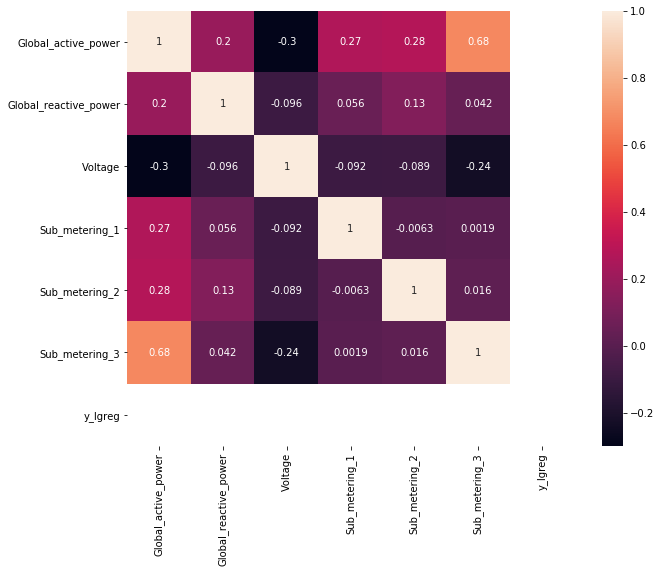

In [152]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot = True)

In [39]:
#sns.distplot(df_train.Global_intensity)

In [153]:
df_train.describe()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
count,1.183035e+06,1.183035e+06,1.183035e+06,1.183035e+06,1.183035e+06,1.183035e+06,1183035.0
mean,9.694532e-01,1.116294e-01,2.405788e+02,4.581285e-01,8.201566e-01,5.741536e+00,0.0
std,8.408555e-01,1.036722e-01,3.275863e+00,3.708445e+00,3.758680e+00,8.177821e+00,0.0
min,7.600000e-02,0.000000e+00,2.244400e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.940000e-01,0.000000e+00,2.386100e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,5.220000e-01,9.400000e-02,2.407100e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,1.478000e+00,1.740000e-01,2.427100e+02,0.000000e+00,1.000000e+00,1.700000e+01,0.0
max,5.100000e+00,1.222000e+00,2.539400e+02,5.200000e+01,5.500000e+01,3.100000e+01,0.0


In [154]:
df_train.Sub_metering_1.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99,1.0])

0.25     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     0.0
0.90     0.0
0.95     1.0
0.98     2.0
0.99    22.0
1.00    52.0
Name: Sub_metering_1, dtype: float64

In [155]:
df_train.Sub_metering_2.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     1.0
0.90     1.0
0.95     2.0
0.98     5.0
0.99    26.0
Name: Sub_metering_2, dtype: float64

In [156]:
df_train.Sub_metering_3.quantile([0.25,0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

0.25     0.0
0.50     0.0
0.60     1.0
0.70    16.0
0.80    18.0
0.90    18.0
0.95    18.0
0.98    19.0
0.99    19.0
Name: Sub_metering_3, dtype: float64

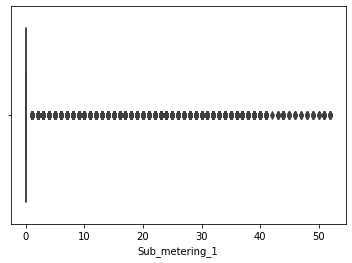

In [157]:
sns.boxplot(data = df_train, x = 'Sub_metering_1')

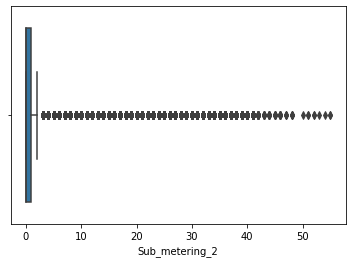

In [158]:
sns.boxplot(data = df_train, x = 'Sub_metering_2')

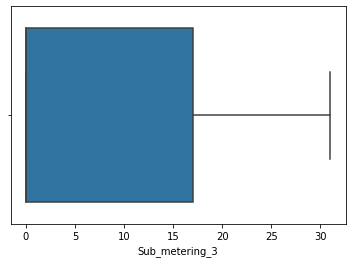

In [159]:
sns.boxplot(data = df_train, x = 'Sub_metering_3')

In [160]:
df_train.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
0,3.520,0.522,235.02,0.0,2.0,17.0,0
1,3.384,0.282,237.14,0.0,0.0,17.0,0
2,3.270,0.152,236.73,0.0,0.0,17.0,0
3,3.430,0.156,237.06,0.0,0.0,17.0,0
4,3.266,0.000,237.13,0.0,0.0,18.0,0


# Train Test Split

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X = df_train.drop(['y_lgreg'],1)
y = df_train.y_lgreg

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# Scaling

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [165]:
var = X_train.columns.to_list()
var

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [166]:
X_train[var] = scaler.fit_transform(X_train[var])
X_train.head()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
576774,0.657025,-0.324909,0.952449,-0.12321,-0.217942,1.620181
1029243,-0.734739,-1.076799,1.346076,-0.12321,-0.217942,-0.702528
203555,0.155039,1.082476,-2.080611,-0.12321,-0.217942,-0.702528
810382,-0.991680,-1.076799,-1.629009,-0.12321,-0.217942,-0.702528
945429,2.151090,0.195631,0.485590,0.14772,6.730491,-0.702528


In [167]:
X_test[var] = scaler.transform(X_test[var])

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [169]:
X_train.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
576774,0.657025,-0.324909,0.952449,-0.12321,-0.217942,1.620181
1029243,-0.734739,-1.076799,1.346076,-0.12321,-0.217942,-0.702528
203555,0.155039,1.082476,-2.080611,-0.12321,-0.217942,-0.702528
810382,-0.991680,-1.076799,-1.629009,-0.12321,-0.217942,-0.702528
945429,2.151090,0.195631,0.485590,0.14772,6.730491,-0.702528


In [170]:
X_test.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
186963,-0.891759,-0.189954,-1.729704,-0.12321,0.049306,-0.702528
675290,0.126490,-0.363467,-0.841756,-0.12321,0.049306,-0.702528
1081815,-0.910791,-0.614097,0.799881,-0.12321,-0.217942,-0.702528
303,1.753783,-0.382746,-0.142992,-0.12321,-0.217942,-0.702528
1094129,0.445287,-0.382746,-0.597646,-0.12321,-0.217942,1.497934


# Creating Logistic Regression Model

In [171]:
df_train.y_lgreg.value_counts()

0    1183035
Name: y_lgreg, dtype: int64

In [172]:
df_valid.y_lgreg.value_counts()

0    387482
1      6968
Name: y_lgreg, dtype: int64

In [173]:
y_train.value_counts()

0    828124
Name: y_lgreg, dtype: int64

In [174]:
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression()

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
lgreg = RandomForestClassifier().fit(df_train.drop('y_lgreg',1),df_train['y_lgreg'])

## Train accuracy

In [191]:
from sklearn import metrics

In [192]:
train_pred = lgreg.predict(df_train.drop('y_lgreg',1))

In [194]:
print(metrics.classification_report(df_train['y_lgreg'],train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1183035

    accuracy                           1.00   1183035
   macro avg       1.00      1.00      1.00   1183035
weighted avg       1.00      1.00      1.00   1183035



In [195]:
metrics.confusion_matrix(df_train['y_lgreg'],train_pred)

array([[1183035]], dtype=int64)

In [196]:
metrics.accuracy_score(df_train['y_lgreg'],train_pred)

1.0

# Test Accuracy

In [197]:
test_pred = lgreg.predict(df_test.drop('y_lgreg',1))

In [198]:
print(metrics.classification_report(df_test['y_lgreg'],test_pred))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    394344
           1       0.00      0.00      0.00      6968

    accuracy                           0.98    401312
   macro avg       0.49      0.50      0.50    401312
weighted avg       0.97      0.98      0.97    401312



In [199]:
metrics.confusion_matrix(df_test['y_lgreg'],test_pred)

array([[394344,      0],
       [  6968,      0]], dtype=int64)

In [200]:
metrics.accuracy_score(df_test['y_lgreg'],test_pred)

0.9826369508013715

In [201]:
df_test.y_lgreg.value_counts()

0    394344
1      6968
Name: y_lgreg, dtype: int64

# Transforming validation set

In [77]:
df_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,y_lgreg
1849280,0.376,0.208,237.01,0.0,0.0,1.0,0
1849281,0.380,0.218,239.24,0.0,0.0,0.0,0
1849282,0.378,0.216,238.64,0.0,0.0,1.0,0
1849283,0.378,0.218,239.13,0.0,0.0,1.0,0
1849284,0.376,0.214,238.32,0.0,0.0,0.0,0


In [78]:
X_valid = df_valid.drop('y_lgreg',1)
y_valid = df_valid.y_lgreg

In [79]:
var

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [80]:
X_valid[var] = scaler.transform(X_valid[var])
X_valid.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
1849280,-0.682438,0.761006,-1.152955,-0.184938,-0.223415,-0.652663
1849281,-0.678715,0.850059,-0.474134,-0.184938,-0.223415,-0.770778
1849282,-0.680577,0.832248,-0.656776,-0.184938,-0.223415,-0.652663
1849283,-0.680577,0.850059,-0.507618,-0.184938,-0.223415,-0.652663
1849284,-0.682438,0.814438,-0.754186,-0.184938,-0.223415,-0.770778


In [81]:
valid_pred = lgreg.predict(X_valid)

In [82]:
print(metrics.classification_report(y_valid,valid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196138
           1       0.99      0.96      0.98      3574

    accuracy                           1.00    199712
   macro avg       1.00      0.98      0.99    199712
weighted avg       1.00      1.00      1.00    199712



In [83]:
metrics.confusion_matrix(y_valid,valid_pred)

array([[196107,     31],
       [   133,   3441]], dtype=int64)

In [84]:
metrics.accuracy_score(y_valid,valid_pred)

0.999178817497196

# KNN -- takes too much time to compute

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
#knn = KNeighborsClassifier(n_neighbors=5)

In [87]:
#knn = knn.fit(X_train,y_train)

In [88]:
#knn_pred = knn.predict(X_train)

# SVM 

In [89]:
from sklearn.svm import SVC

In [90]:
svm = SVC(kernel='linear') # it took less time

In [ ]:
svm = svm.fit(X_train,y_train)

### Train Accuracy

In [ ]:
svm_train_pred = svm.predict(X_train)

In [ ]:
metrics.confusion_matrix(y_train,svm_train_pred)

In [ ]:
print(metrics.classification_report(y_train,svm_train_pred))

In [ ]:
metrics.accuracy_score(y_train,svm_train_pred)

### Test Accuracy

In [ ]:
svm_test_pred = svm.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test,svm_test_pred)

In [ ]:
print(metrics.classification_report(y_test,svm_test_pred))

In [ ]:
metrics.accuracy_score(y_test,svm_test_pred)

### Validation Accuracy

In [ ]:
svm_valid_pred = svm.predict(X_valid)

In [ ]:
metrics.confusion_matrix(y_valid,svm_valid_pred)

In [ ]:
print(metrics.classification_report(y_valid,svm_valid_pred))

## RBF TAking too much time

In [ ]:
'''from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm = svm.fit(X_train,y_train)

### Train Accuracy
print("TRAIIIIINNN")
svm_train_pred = svm.predict(X_train)

print(metrics.confusion_matrix(y_train,svm_train_pred))

print(metrics.classification_report(y_train,svm_train_pred))

print(metrics.accuracy_score(y_train,svm_train_pred))

### Test Accuracy
print("TEEEESSSSSTTTTT")
svm_test_pred = svm.predict(X_test)

print(metrics.confusion_matrix(y_test,svm_test_pred))

print(metrics.classification_report(y_test,svm_test_pred))

print(metrics.accuracy_score(y_test,svm_test_pred))

### Validation Accuracy
print("Vaaaalidation")
svm_valid_pred = svm.predict(X_valid)

print(metrics.confusion_matrix(y_valid,svm_valid_pred))

print(metrics.classification_report(y_valid,svm_valid_pred))
print(metrics.accuracy_score(y_valid,svm_valid_pred))'''

TRAIIIIINNN


# SIGMOID KERNEL

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='sigmoid')

svm = svm.fit(X_train,y_train)

In [ ]:
### Train Accuracy
print("TRAIIIIINNN")
svm_train_pred = svm.predict(X_train)

print(metrics.confusion_matrix(y_train,svm_train_pred))

print(metrics.classification_report(y_train,svm_train_pred))

print(metrics.accuracy_score(y_train,svm_train_pred))

In [ ]:
### Test Accuracy
print("TEEEESSSSSTTTTT")
svm_test_pred = svm.predict(X_test)

print(metrics.confusion_matrix(y_test,svm_test_pred))

print(metrics.classification_report(y_test,svm_test_pred))

print(metrics.accuracy_score(y_test,svm_test_pred))

In [ ]:
### Validation Accuracy
print("Vaaaalidation")
svm_valid_pred = svm.predict(X_valid)

print(metrics.confusion_matrix(y_valid,svm_valid_pred))

print(metrics.classification_report(y_valid,svm_valid_pred))
print(metrics.accuracy_score(y_valid,svm_valid_pred))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB,BernouilliNB,GaussainNB